# Corpus Hashtags

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns; sns.set()
%matplotlib inline
# packages for NLP preprocessing
import nltk
from sklearn.feature_extraction import text 
from nltk.stem import WordNetLemmatizer 
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pickle

## Load in `raw_df` with Uncleaned Tweets

In [3]:
# showing the whole tweet column
pd.set_option('max_colwidth', 280) 

In [4]:
# importing raw tweets before they were cleaned
raw_df = pd.read_pickle('../pickle/raw_tweets_df.pkl')

In [5]:
raw_df.head(2)

,total_votes,hate_speech_votes,other_votes,label,tweet
0,3,0,3,0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,3,0,3,0,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!


## Filtering Out Hashtags From Raw Tweets

In [6]:
raw_df['hashtags'] = raw_df['tweet'].str.extract('([^&]#[\w]+)', expand=False).str.strip()

In [7]:
raw_df.head(2)

,total_votes,hate_speech_votes,other_votes,label,tweet,hashtags
0,3,0,3,0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,NaN
1,3,0,3,0,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,NaN


In [8]:
raw_df.shape

(24783, 6)

In [9]:
raw_df.hashtags.isna().sum()

22829

#### Only 7.884% of the tweets have hashtags on them 

In [10]:
# dropping tweet rows with no hashtags
raw_df.dropna(inplace=True)

In [11]:
raw_df.shape

(1954, 6)

In [12]:
raw_df.reset_index(inplace=True)

## New Dataframe with Essential Columns

In [13]:
hashtags_df = raw_df[['label', 'hashtags']].copy()

In [14]:
hashtags_df.head()

,label,hashtags
0,0,#Shots
1,0,#2MW
2,0,#HappyHumpDay
3,0,.#ahmesehwetness
4,0,#Eaglesnation


## Round 2 Cleaning
removing any characters before the #

In [15]:
hashtags_df['hashtags_2'] = hashtags_df['hashtags'].str.extract('(#[\w]+)', expand=False).str.strip()

In [16]:
hashtags_df.head()

,label,hashtags,hashtags_2
0,0,#Shots,#Shots
1,0,#2MW,#2MW
2,0,#HappyHumpDay,#HappyHumpDay
3,0,.#ahmesehwetness,#ahmesehwetness
4,0,#Eaglesnation,#Eaglesnation


## Top Hashtags for Each Category

In [17]:
# creating new dfs for each classification
# hate speech
df_freq_hate = hashtags_df[hashtags_df['label']==1]
# not hate speech
df_freq_not_hate = hashtags_df[hashtags_df['label']==0]

In [18]:
# pulling out the hashtags column for raw tweets
hashtag_hate = df_freq_hate['hashtags_2']
hashtag_not_hate = df_freq_not_hate['hashtags_2']

In [19]:
# exact amount of hashtags in hate speech
total_vocab_hate = set()
for comment in hashtag_hate:
    total_vocab_hate.update(comment)
len(total_vocab_hate)

53

In [20]:
# exact amount of hashtags in not hate speech
total_vocab_NOT_hate = set()
for comment in hashtag_not_hate:
    total_vocab_NOT_hate.update(comment)
len(total_vocab_NOT_hate)

64

## Most Common Hashtags in Each Category

In [21]:
import collections
from collections import Counter

# list of all words across hate speech tweets
df_hate_count = list(df_freq_hate['hashtags_2'])
# create counter
hate_hashtag = collections.Counter(df_hate_count)
# top 10 hate speech tweet hashtags
hate_hashtag.most_common(10)

[('#LosAngeles', 6),
 ('#faggots', 5),
 ('#tcot', 5),
 ('#faggot', 4),
 ('#Ferguson', 3),
 ('#ISIS', 2),
 ('#NFL', 2),
 ('#1', 2),
 ('#California', 2),
 ('#Farrakhan', 2)]

In [22]:
# list of all words across NON hate speech tweets
df_not_hate_count = list(df_freq_not_hate['hashtags_2'])
# create counter
not_hate_hashtag = collections.Counter(df_not_hate_count)
# top 10 hate speech tweet hashtags
not_hate_hashtag.most_common(10)

[('#Yankees', 60),
 ('#android', 48),
 ('#tcot', 21),
 ('#teabagger', 17),
 ('#ISIS', 12),
 ('#teabaggers', 11),
 ('#bitch', 10),
 ('#pussy', 10),
 ('#vote5sos', 9),
 ('#tbt', 8)]

## Frequency Distribution Graph

In [23]:
# create counts of hate and not hate with values and words
hate_bar_counts = [x[1] for x in hate_hashtag.most_common(25)]
hate_bar_words = [x[0] for x in hate_hashtag.most_common(25)]

not_hate_bar_counts = [x[1] for x in not_hate_hashtag.most_common(25)]
not_hate_bar_words = [x[0] for x in not_hate_hashtag.most_common(25)]

In [24]:
# set the color of the bar graphs
color = cm.magma(np.linspace(.4,.8, 30))

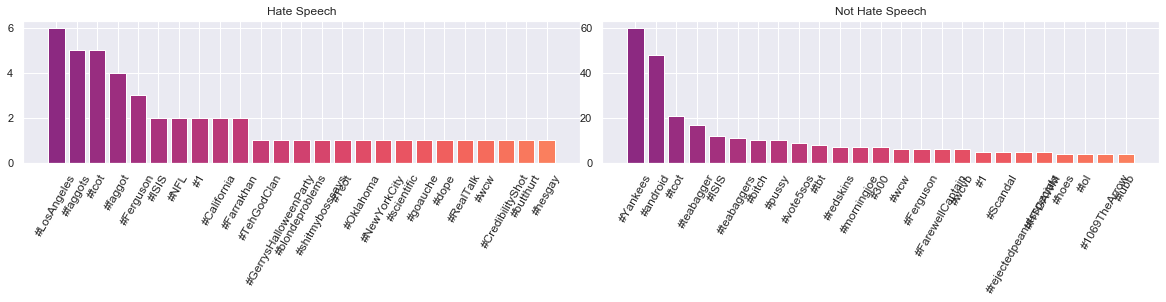

In [25]:
# top 25 hashtags for each label
new_figure = plt.figure(figsize=(16,4))

ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)
# generating a bar chart on each axes
ax.bar(hate_bar_words, hate_bar_counts, color=color)
ax2.bar(not_hate_bar_words, not_hate_bar_counts, color=color )

ax.title.set_text('Hate Speech')
ax2.title.set_text('Not Hate Speech')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60, fontsize=12)
plt.tight_layout(pad=0)

# plt.savefig('word count bar graphs.png')
plt.show()

## Word Clouds - Top 25 Hashtags for Each Label

In [26]:
from wordcloud import WordCloud
hate_dict = dict(zip(hate_bar_words, hate_bar_counts))
not_hate_dict = dict(zip(not_hate_bar_words, not_hate_bar_counts))

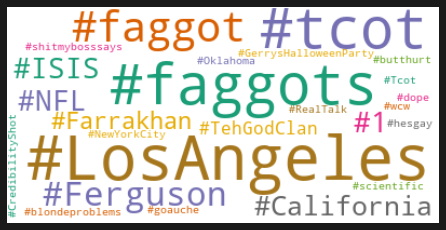

In [27]:
# create the word cloud for hate speech
hate_wordcloud = WordCloud(colormap='Dark2', background_color='white', random_state=14).generate_from_frequencies(hate_dict)

# Display the generated image w/ matplotlib:
plt.figure(figsize=(6,6), facecolor='k')
plt.imshow(hate_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()

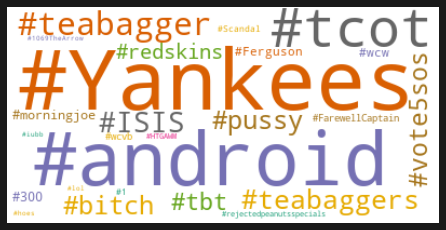

In [28]:
# create the word cloud for NOT hate speech
not_hate_wordcloud = WordCloud(colormap='Dark2', background_color='white', random_state=16).generate_from_frequencies(not_hate_dict)

plt.figure(figsize=(6,6), facecolor='k')
plt.imshow(not_hate_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
# plt.savefig('not_satire_wordcloud.png')

plt.show()

## Joining Word Clouds

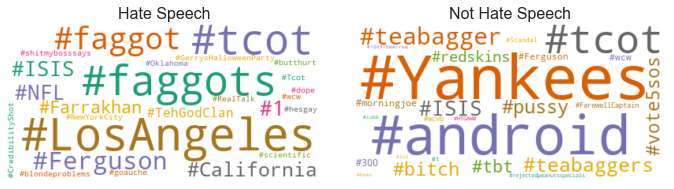

In [36]:
# new figure
f = plt.figure(figsize=(10,8))

# hate speech word cloud
f.add_subplot(1,2, 1)
plt.imshow(hate_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Hate Speech', fontsize=16)

# not hate speech word cloud
f.add_subplot(1,2, 2)
plt.imshow(not_hate_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Not Hate Speech', fontsize=16)

# setting spacing between graphs
plt.tight_layout(pad=3)

plt.savefig('../visualizations/uncensored_hashtags.png', bbox_inches = "tight", pad_inches=.5)

#### Now that the word clouds are joined, let's censor them.

Please refer to `censored_hashtags.ipynb` to see the censoring process.